C:\Users\jeeva\anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'projection'


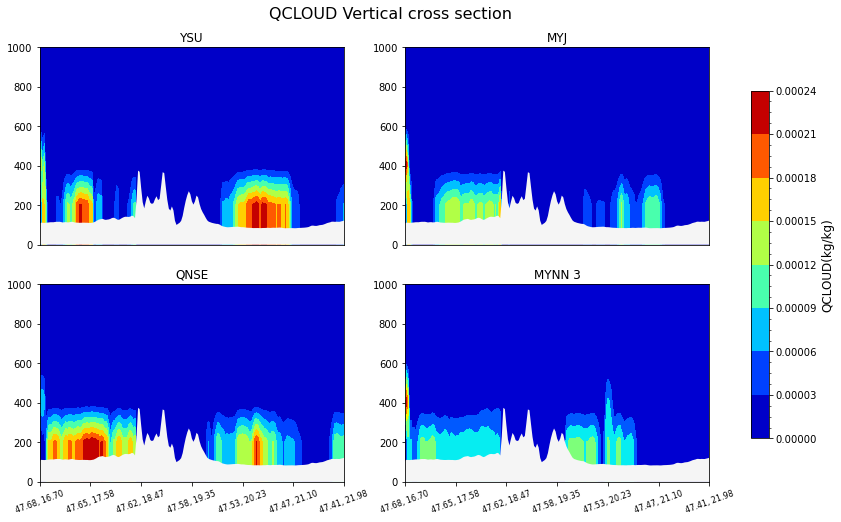

In [1]:
import numpy as np
from metpy.cbook import get_test_data
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from netCDF4 import Dataset

from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                        cartopy_xlim, cartopy_ylim, interpline, CoordPair)

ysu1 = Dataset("wrf_ysu_24112020_06.nc")
myj1 = Dataset("wrf_myj_24112020_06.nc")
qnse1 = Dataset("wrf_QNSE_24112020_06.nc")
mynn1 = Dataset("wrf_mynn3_24112020_06.nc")

# Define the cross section lat long
cros_start = CoordPair(lat=47.68, lon=16.69)
cros_end = CoordPair(lat=47.41, lon=21.98)

start_point = CoordPair(lat=47.68, lon=16.69)
end_point = CoordPair(lat=47.41, lon=21.98)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), constrained_layout=False)
axlist = axarr.flatten()

#===================================================================================================#
#               YSU Vertical cross section
#===================================================================================================
#Get the WRF variables
ysu_ht = getvar(ysu1,"z")#,timeidx=52)
ysu_ter = getvar(ysu1,"ter")#,timeidx=52)
# cloud mixing ratio
ysu_lwc = getvar(ysu1,"QCLOUD")#,timeidx=52)

ysu_z_cros = vertcross(ysu_lwc,ysu_ht,wrfin=ysu1,
                  start_point=cros_start,
                  end_point=cros_end,
                  latlon=True,
                  meta=True)
dbz_cros_filled = np.ma.copy(to_np(ysu_z_cros))

for i in range(dbz_cros_filled.shape[-1]):
    column_vals = dbz_cros_filled[:,i]
    first_idx = int(np.transpose((column_vals > -10).nonzero())[0])
    dbz_cros_filled[0:first_idx,i] = dbz_cros_filled[first_idx,i]

ter_line = interpline(ysu_ter,wrfin=ysu1, start_point=cros_start,
                     end_point=cros_end)
# get the lat lon points
lats, lons = latlon_coords(ysu_lwc)
# get the projection 
cart_proj = get_cartopy(ysu_lwc)
# creating figure

xs = np.arange(0,ysu_z_cros.shape[-1],1)
ys = to_np(ysu_z_cros.coords["vertical"])
mp1 = axlist[0].contourf(xs,ys,to_np(dbz_cros_filled),
                                cmap = "jet", projection=False)

# cb_lwc = fig.colorbar(lwc_countours,ax=ax_cros)
# cb_lwc.ax.tick_params(labelsize=8)

#filling the mountain area
ht_fill1 = axlist[0].fill_between(xs,0,to_np(ter_line),
                              facecolor="whitesmoke")

# #set the s-ticks to use latititude and longitude
# coord_pairs = to_np(ysu_z_cros.coords["xy_loc"])
# x_ticks = np.arange(coord_pairs.shape[0])
# x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]
# #set the desired number of xticks below
# num_ticks = 6
# thin = int((len(x_ticks)/num_ticks)+0.5)
# # print(x_labels[::thin])
# axlist[0].set_xticks(x_ticks[::thin])
# axlist[0].set_xticklabels(x_labels[::thin], rotation=20, fontsize=8)

axlist[0].tick_params(left = True, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
# set the range of y-axis
axlist[0].set_ylim([0,1000])

# add title 
axlist[0].set_title("YSU",{"fontsize" :12})

#===================================================================================================#
#               myj Vertical cross section
#===================================================================================================
#Get the WRF variables
myj_ht = getvar(myj1,"z")#,timeidx=52)
myj_ter = getvar(myj1,"ter")#,timeidx=52)
# cloud mixing ratio
myj_lwc = getvar(myj1,"QCLOUD")#,timeidx=52)

myj_z_cros = vertcross(myj_lwc,myj_ht,wrfin=myj1,
                  start_point=cros_start,
                  end_point=cros_end,
                  latlon=True,
                  meta=True)
dbz_cros_filled = np.ma.copy(to_np(myj_z_cros))

for i in range(dbz_cros_filled.shape[-1]):
    column_vals = dbz_cros_filled[:,i]
    first_idx = int(np.transpose((column_vals > -10).nonzero())[0])
    dbz_cros_filled[0:first_idx,i] = dbz_cros_filled[first_idx,i]

ter_line = interpline(myj_ter,wrfin=myj1, start_point=cros_start,
                     end_point=cros_end)
# get the lat lon points
lats, lons = latlon_coords(myj_lwc)
# get the projection 
cart_proj = get_cartopy(myj_lwc)
# creating figure

xs = np.arange(0,myj_z_cros.shape[-1],1)
ys = to_np(myj_z_cros.coords["vertical"])
mp2 = axlist[1].contourf(xs,ys,to_np(dbz_cros_filled),
                                cmap = "jet")

# cb_lwc = fig.colorbar(lwc_countours,ax=ax_cros)
# cb_lwc.ax.tick_params(labelsize=8)

#filling the mountain area
ht_fill = axlist[1].fill_between(xs,0,to_np(ter_line),
                              facecolor="whitesmoke")

# #set the s-ticks to use latititude and longitude
# coord_pairs = to_np(myj_z_cros.coords["xy_loc"])
# x_ticks = np.arange(coord_pairs.shape[0])
# x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]
# #set the desired number of xticks below
# num_ticks = 6
# thin = int((len(x_ticks)/num_ticks)+0.5)
# # print(x_labels[::thin])
# axlist[1].set_xticks(x_ticks[::thin])
# axlist[1].set_xticklabels(x_labels[::thin], rotation=20, fontsize=8)

axlist[1].tick_params(left = True, right = False , labelleft = True ,
                labelbottom = False, bottom = False)

# set the range of y-axis
axlist[1].set_ylim([0,1000])

# add title 
axlist[1].set_title("MYJ",{"fontsize" :12})

#===================================================================================================#
#               QNSE Vertical cross section
#===================================================================================================
#Get the WRF variables
QNSE_ht = getvar(qnse1,"z")#,timeidx=52)
QNSE_ter = getvar(qnse1,"ter")#,timeidx=52)
# cloud mixing ratio
QNSE_lwc = getvar(qnse1,"QCLOUD")#,timeidx=52)

QNSE_z_cros = vertcross(QNSE_lwc,QNSE_ht,wrfin=qnse1,
                  start_point=cros_start,
                  end_point=cros_end,
                  latlon=True,
                  meta=True)
dbz_cros_filled = np.ma.copy(to_np(QNSE_z_cros))

for i in range(dbz_cros_filled.shape[-1]):
    column_vals = dbz_cros_filled[:,i]
    first_idx = int(np.transpose((column_vals > -10).nonzero())[0])
    dbz_cros_filled[0:first_idx,i] = dbz_cros_filled[first_idx,i]

ter_line = interpline(QNSE_ter,wrfin=qnse1, start_point=cros_start,
                     end_point=cros_end)
# get the lat lon points
lats, lons = latlon_coords(QNSE_lwc)
# get the projection 
cart_proj = get_cartopy(QNSE_lwc)
# creating figure

xs = np.arange(0,QNSE_z_cros.shape[-1],1)
ys = to_np(QNSE_z_cros.coords["vertical"])
mp3 = axlist[2].contourf(xs,ys,to_np(dbz_cros_filled),
                                cmap = "jet")

# cb_lwc = fig.colorbar(lwc_countours,ax=ax_cros)
# cb_lwc.ax.tick_params(labelsize=8)

#filling the mountain area
ht_fill = axlist[2].fill_between(xs,0,to_np(ter_line),
                              facecolor="whitesmoke")

#set the s-ticks to use latititude and longitude
coord_pairs = to_np(QNSE_z_cros.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]
#set the desired number of xticks below
num_ticks = 6
thin = int((len(x_ticks)/num_ticks)+0.5)
# print(x_labels[::thin])
axlist[2].set_xticks(x_ticks[::thin])
axlist[2].set_xticklabels(x_labels[::thin], rotation=20, fontsize=8)
# axlist[2].tick_params(left = True, right = False , labelleft = True ,
#                 labelbottom = False, bottom = False)
# # set the range of y-axis
axlist[2].set_ylim([0,1000])

# add title 
axlist[2].set_title("QNSE",{"fontsize" :12})

#===================================================================================================#
#               mynn Vertical cross section
#===================================================================================================
#Get the WRF variables
mynn_ht = getvar(mynn1,"z")#,timeidx=52)
mynn_ter = getvar(mynn1,"ter")#,timeidx=52)
# cloud mixing ratio
mynn_lwc = getvar(mynn1,"QCLOUD")#,timeidx=52)

mynn_z_cros = vertcross(mynn_lwc,mynn_ht,wrfin=mynn1,
                  start_point=cros_start,
                  end_point=cros_end,
                  latlon=True,
                  meta=True)
dbz_cros_filled = np.ma.copy(to_np(mynn_z_cros))

for i in range(dbz_cros_filled.shape[-1]):
    column_vals = dbz_cros_filled[:,i]
    first_idx = int(np.transpose((column_vals > -10).nonzero())[0])
    dbz_cros_filled[0:first_idx,i] = dbz_cros_filled[first_idx,i]

ter_line = interpline(mynn_ter,wrfin=mynn1,
                      start_point=cros_start,
                      end_point=cros_end)
# get the lat lon points
lats, lons = latlon_coords(mynn_lwc)
# get the projection 
cart_proj = get_cartopy(mynn_lwc)
# creating figure

xs = np.arange(0,mynn_z_cros.shape[-1],1)
ys = to_np(mynn_z_cros.coords["vertical"])
mp4 = axlist[3].contourf(xs,ys,to_np(dbz_cros_filled), cmap = "jet")

# cb_lwc = fig.colorbar(lwc_countours,ax=ax_cros)
# cb_lwc.ax.tick_params(labelsize=8)

#filling the mountain area
ht_fill = axlist[3].fill_between(xs,0,to_np(ter_line),facecolor="whitesmoke")

#set the x-ticks to use latititude and longitude
coord_pairs = to_np(mynn_z_cros.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}") for pair in to_np(coord_pairs)]
#set the desired number of xticks below
num_ticks = 6
thin = int((len(x_ticks)/num_ticks)+0.5)
# print(x_labels[::thin])
axlist[3].set_xticks(x_ticks[::thin])
axlist[3].set_xticklabels(x_labels[::thin], rotation=20, fontsize=8)

# set the range of y-axis
axlist[3].set_ylim([0,1000])

# add title 
axlist[3].set_title("MYNN 3",{"fontsize" :12})

# cb_lwc = fig.colorbar(lwc_countours,ax=ax_cros)
# cb_lwc.ax.tick_params(labelsize=8)

axbar = [axlist[0],axlist[1],axlist[2],axlist[3]]#,axlist[4],axlist[5],axlist[6],axlist[7]]
cbar = fig.colorbar(mp1, ax=axbar,shrink=0.8)
cbar.minorticks_on()
cbar.set_label('QCLOUD(kg/kg)',fontsize=12)
plt.savefig("multi_QCLOUD_Vertcross.jpg",dpi=300)
fig.suptitle('QCLOUD Vertical cross section',x=0.45, y=.95,fontsize=16)
plt.show()